In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.cluster import KMeans

In [2]:
np.random.seed(101)
x1a = np. random.normal(5, 1, 100)
x2a = np.random.normal(5, 1, 100)

In [3]:
np.random.seed(102)
x1b = np. random.normal(1, 1, 100)
x2b = np.random.normal(3, 1, 100)

In [4]:
np.random.seed(103)
x1c = np. random.normal(5, 1, 100)
x2c = np.random.normal(1, 1, 100)

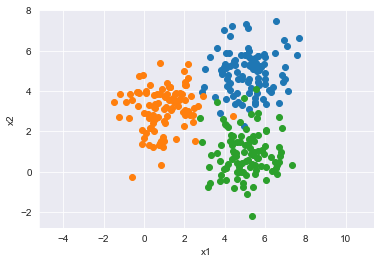

In [5]:
plt.scatter(x1a, x2a)
plt.scatter(x1b, x2b)
plt.scatter(x1c, x2c)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
x1 = np.concatenate([x1a, x1b, x1c])
x2 = np.concatenate([x2a, x2b, x2c])
print(len(x1), len(x2))

300 300


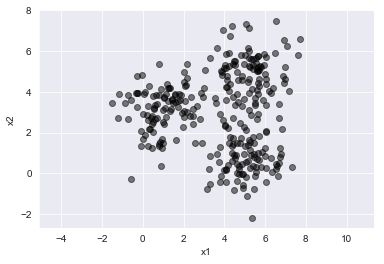

In [7]:
plt.scatter(x1, x2, color ='k', alpha=0.5)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
X = pd.DataFrame({'x1' : x1, 'x2' : x2})
X.head()

,x1,x2
0,7.706850,6.606780
1,5.628133,3.884290
2,5.907969,3.614621
3,5.503826,3.670340
4,5.651118,5.041460


In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [11]:
clustered_data = X.copy()
clustered_data['cluster'] = kmeans.predict(X)

In [12]:
clustered_data.head()

,x1,x2,cluster
0,7.706850,6.606780,0
1,5.628133,3.884290,0
2,5.907969,3.614621,0
3,5.503826,3.670340,0
4,5.651118,5.041460,0


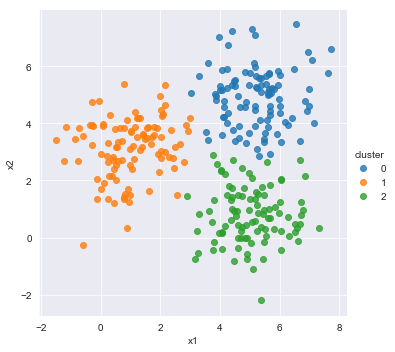

In [13]:
sns.lmplot(x='x1', y='x2', hue='cluster', data=clustered_data, fit_reg=False)
plt.show()

In [14]:
def fit_and_plot_kmeans(model, X):
    kmeans = model
    kmeans.fit(X)
    
    clustered_data= X.copy()
    clustered_data['cluster'] = kmeans.predict(X)
    
    sns.lmplot(x='x1',  y='x2', hue='cluster', data=clustered_data, fit_reg=False)
    plt.show()

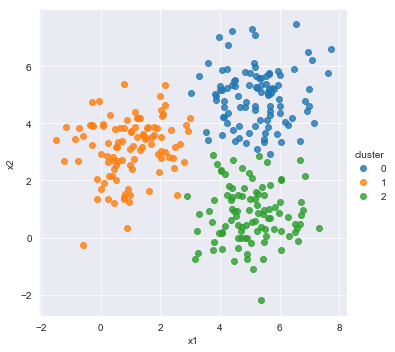

In [15]:
kmeans_iter1 = KMeans(n_clusters=3, random_state=123, max_iter=1)
fit_and_plot_kmeans(kmeans_iter1, X)

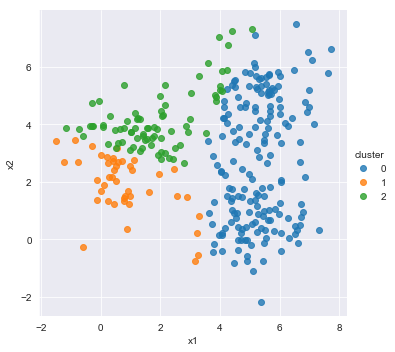

In [16]:
kmeans_iter1 = KMeans(n_clusters=3, random_state=123, max_iter=1, n_init=1, init='random')
fit_and_plot_kmeans(kmeans_iter1, X)

Iteration 1


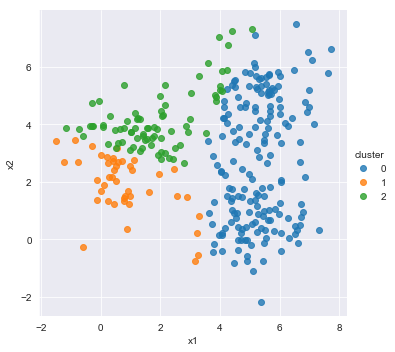

Iteration 2


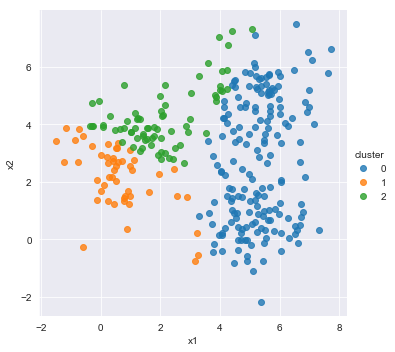

Iteration 3


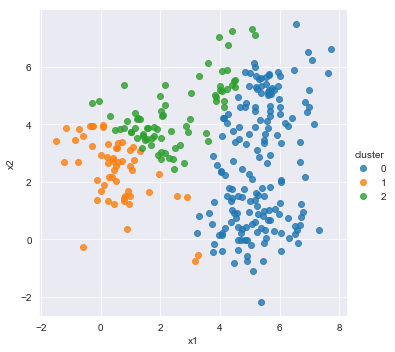

Iteration 4


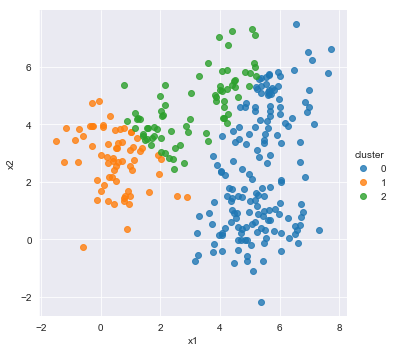

Iteration 5


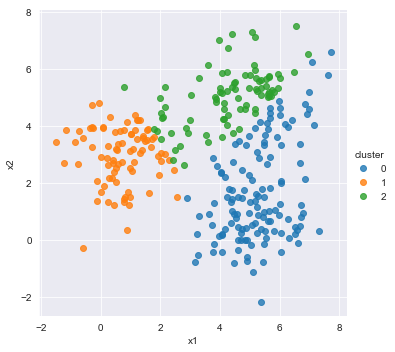

Iteration 6


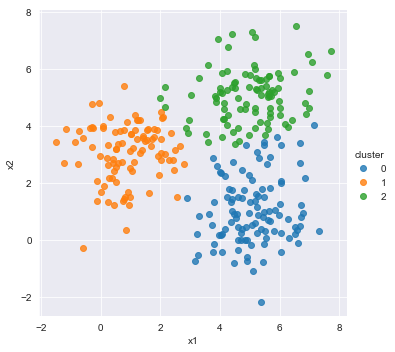

Iteration 7


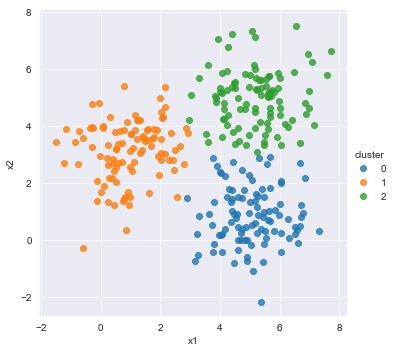

Iteration 8


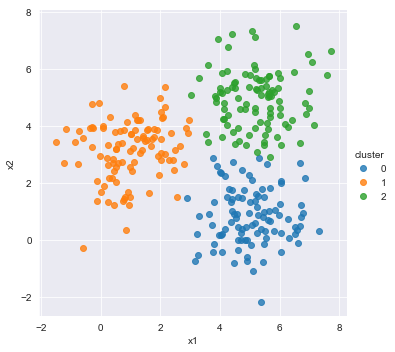

Iteration 9


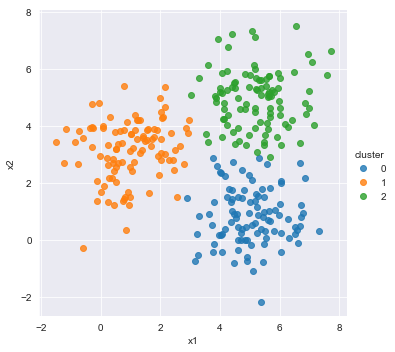

Iteration 10


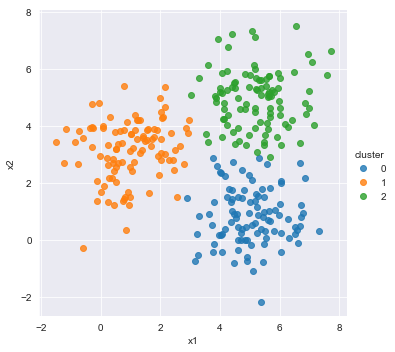

In [17]:
for max_iterations in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print('Iteration', max_iterations)
    
    kmeans = KMeans(n_clusters=3, random_state=123, max_iter=max_iterations, n_init=1, init='random')
    fit_and_plot_kmeans(kmeans, X)

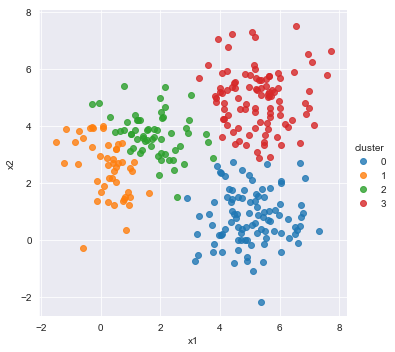

In [18]:
kmeans = KMeans(n_clusters=4, random_state=123, max_iter=max_iterations, n_init=1, init='random')
fit_and_plot_kmeans(kmeans, X)

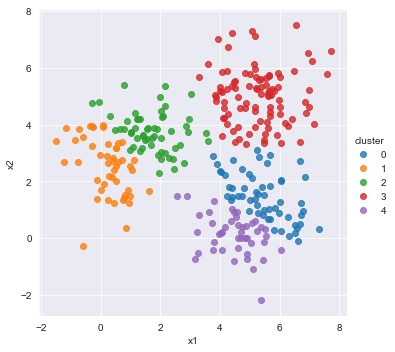

In [19]:
kmeans = KMeans(n_clusters=5, random_state=123, max_iter=max_iterations, n_init=1, init='random')
fit_and_plot_kmeans(kmeans, X)

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
base_df =pd.read_csv('analytical_base_table.csv', index_col=0)
threshold_item_data= pd.read_csv('threshold_item_data.csv', index_col=0)
pca_item_data= pd.read_csv('pca_item_data.csv', index_col=0)

In [30]:
print('base_df:', base_df.shape)
print('threshold_item_data:', threshold_item_data.shape)
print('pca_item_data:', pca_item_data.shape)

base_df: (414, 8)
threshold_item_data: (414, 20)
pca_item_data: (414, 125)


In [31]:
threshold_df =base_df.join(threshold_item_data)
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5


In [24]:
pca_df =base_df.join(pca_item_data)
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC(),PC().1,...,PC().115,PC().116,PC().117,PC().118,PC().119,PC().120,PC().121,PC().122,PC().123,PC().124
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


In [32]:
k_means =make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [33]:
k_means.fit(base_df)

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [36]:
base_df['cluster'] = k_means.predict(base_df)
base_df.head()

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


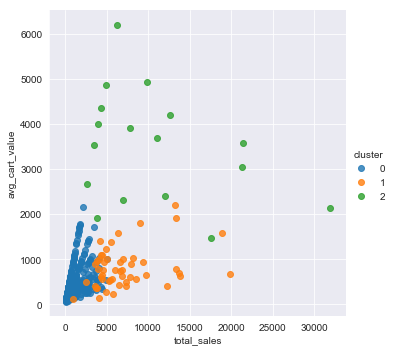

In [37]:
sns.lmplot(x='total_sales', y= 'avg_cart_value', hue='cluster', data=base_df, fit_reg=False)
plt.show()

In [38]:
#Threshold DF Clusering
k_means =make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [39]:
k_means.fit(threshold_df)

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [40]:
threshold_df['cluster']= k_means.predict(threshold_df)
threshold_df.head()

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,1,0,0,2,0,5,2


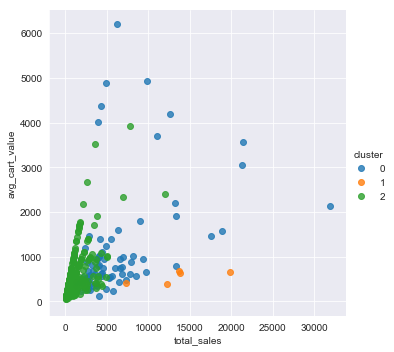

In [45]:
sns.lmplot(x='total_sales', y= 'avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

In [46]:
k_means =make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [47]:
k_means.fit(pca_df)

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [48]:
pca_df['cluster'] = k_means.predict(pca_df)
pca_df.head()

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC(),PC().1,...,PC().116,PC().117,PC().118,PC().119,PC().120,PC().121,PC().122,PC().123,PC().124,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828892,...,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219839,1.226195,...,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260838,2.387828,...,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929319,-0.714874,...,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053129,2.110788,...,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235,0


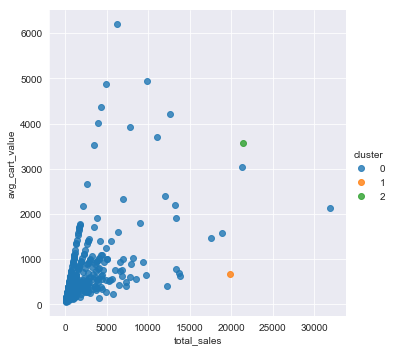

In [49]:
sns.lmplot(x='total_sales', y= 'avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

In [52]:
from sklearn.metrics import adjusted_rand_score

In [54]:
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

In [56]:
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.042311307744307906

In [57]:
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.033220422032313936